In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Topic

## What the project is about ?

* Private educational institutions strive to understand the factors that contribute to student success to create a nurturing and fulfilling learning environment. While academic performance serves as a crucial indicator of success, institutions are also interested in exploring how non-academic aspects of a student's life can influence their achievements.

* To gain insights into this matter, we have collected a dataset from Kaggle that focuses on student performance (link provided). The dataset comprises information from 1000 students, consisting of eight features, including five categorical and three quantitative variables. The categorical variables capture demographic data commonly associated with various measures of student achievement. Although they do not explicitly indicate socioeconomic status, these variables provide valuable insights into students' socioeconomic backgrounds. For example, students qualifying for free/reduced lunch and not taking a test preparation course may indicate a lower socioeconomic level compared to students who do not qualify for free/reduced lunch and take a test preparation course. Analyzing these variables can shed light on their association with academic achievement.

* **Initially, we plan to build a regression model** to predict the average score based on non-academic features. However, since the threshold value for success may vary across institutions, a classification model with a fixed threshold might not be appropriate. Through regression modeling, we aim to examine the relationship between non-academic factors and a student's academic accomplishments. **Nonetheless, we will address why a regression model may not be ideal for this specific dataset.**  and we consider building **Classification Model**

* The ultimate objective of this project is to utilize various supervised machine learning techniques to develop models that can predict a student's success or failure based on non-academic measures such as demographic and socioeconomic features. This will enable us to quantify the relationship between these non-academic factors and a student's academic achievements.

* By conducting this analysis, we can uncover valuable insights regarding the non-academic factors that contribute to student success. This knowledge will empower institutions to identify populations that may require additional support and validate the effectiveness of their educational programs.

## Algorithms (Supervised Machine Learning - Parametric and NonParametric Model) 
## Types Of Task (Regression/Classification)

The dataset consists of information from 1000 students, comprising eight features, five of which are categorical, and three are quantitative. The categorical variables capture demographic data commonly associated with various measures of student achievement. While not explicitly indicating socioeconomic status, these variables offer insights into the socioeconomic background of students. For instance, students qualifying for free/reduced lunch and not taking a test preparation course may suggest a lower socioeconomic level compared to students who do not qualify for free/reduced lunch and take a test preparation course. Analyzing these variables can shed light on their association with academic achievement.

The quantitative features—math score, writing score, and reading score—serve as outcome measures for academic achievement. Although not an exhaustive list of indicators (factors such as growth or improvement over time could be important too), they provide a benchmark to assess how the categorical features can be utilized in predicting student outcomes.

This study aims to evaluate the predictive accuracy of students' results using demographic data through three supervised learning models.

##  Data Source 
*  https://www.kaggle.com/datasets/allexanderspb/studentsperformance

# Exploratory Data Analysis

The data will need to be read in and analysed before model can begin. This steps allows for initial observations to help guide the data cleaning and feature engineering process allowing for data to be usable and workable in the modeling step.

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

### Create Target Feature For Regression And Classification

In [6]:
#Regresion Problem
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df['average_score']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64

### Null Value Check 

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64

### Univarent Data Analysis 

Text(0.5, 1.0, 'average_score')

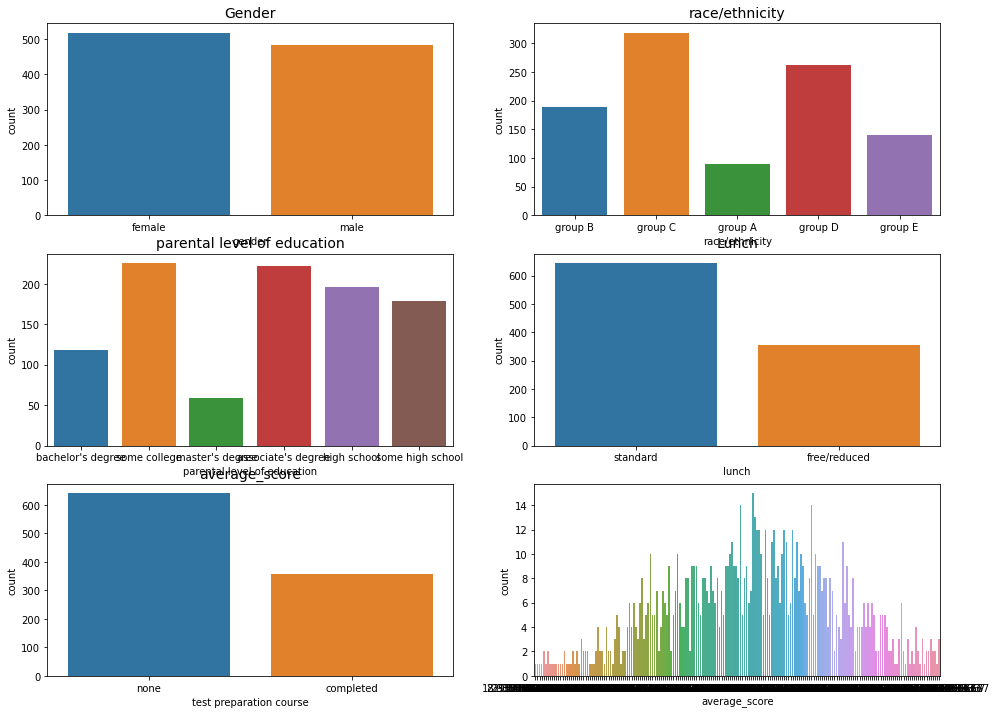

In [8]:
f, ax = plt.subplots(3, 2, figsize=(16, 12))

sns.countplot(x = df['gender'], ax = ax[0][0])
ax[0][0].set_title('Gender', fontsize = 14)

sns.countplot(x = df['race/ethnicity'], ax = ax[0][1])
ax[0][1].set_title('race/ethnicity', fontsize = 14)

sns.countplot(x = df['parental level of education'], ax = ax[1][0])
ax[1][0].set_title('parental level of education', fontsize = 14)

sns.countplot(x = df['lunch'], ax = ax[1][1])
ax[1][1].set_title('Lunch', fontsize = 14)

sns.countplot(x = df['test preparation course'], ax = ax[2][0])
ax[2][0].set_title('test preparation course', fontsize = 14)

sns.countplot(x = df['average_score'], ax = ax[2][1])
ax[2][0].set_title('average_score', fontsize = 14)

### Outlier Analysis

In [9]:
#From the Univarent Analysis It does not look like that data has any outliers.

### Multivarent Data Analysis

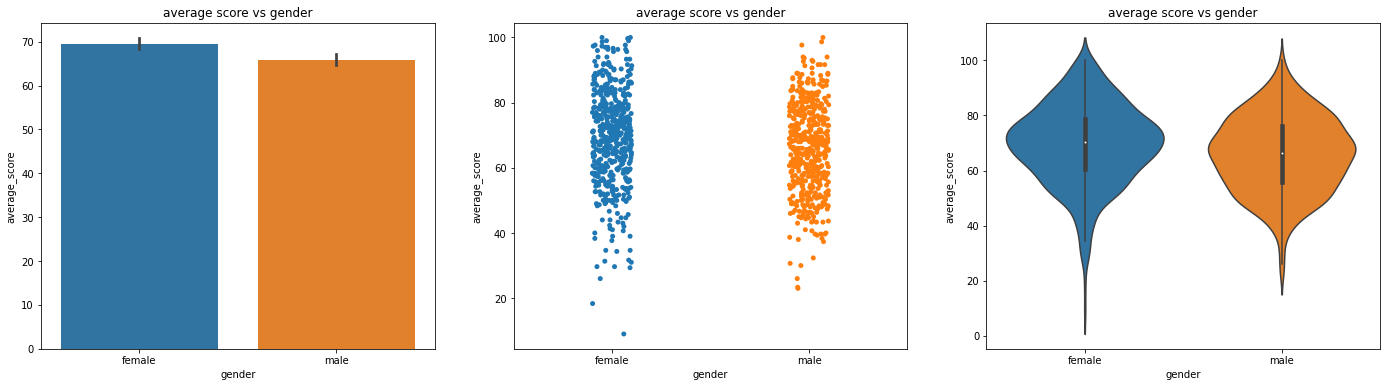

In [10]:
f, ax = plt.subplots(1, 3, figsize = (24, 6))

sns.barplot(x=df['gender'], y=df['average_score'], ax = ax[0])
ax[0].set_title("average score vs gender")

sns.stripplot(x=df['gender'], y=df['average_score'], ax = ax[1])
ax[1].set_title("average score vs gender")

sns.violinplot(x=df['gender'], y=df['average_score'], ax=ax[2])
ax[2].set_title("average score vs gender")

plt.show()

In [11]:
#Conclusion :-  Female's avearge_score is little bit higher than male.

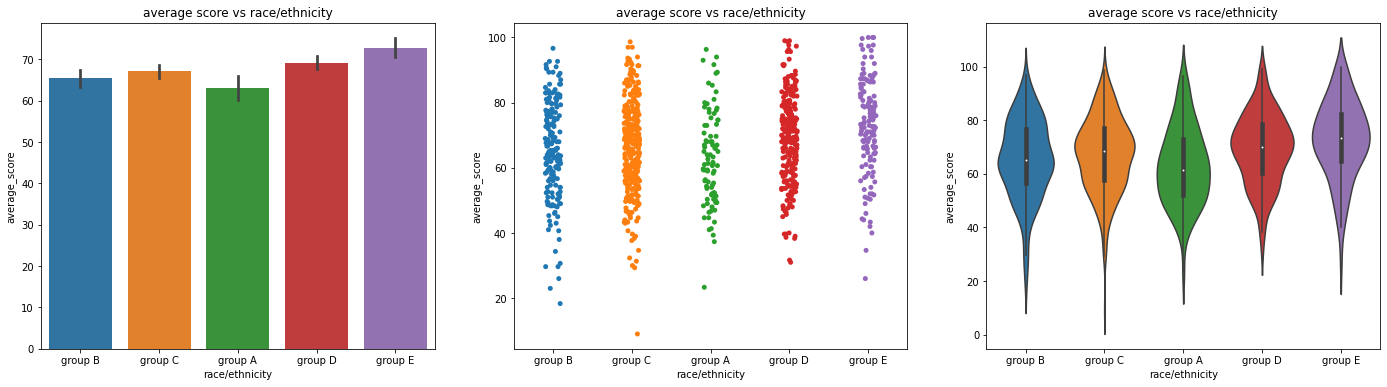

In [12]:
f, ax = plt.subplots(1, 3, figsize = (24, 6))

sns.barplot(x=df['race/ethnicity'], y=df['average_score'], ax = ax[0])
ax[0].set_title("average score vs race/ethnicity")

sns.stripplot(x=df['race/ethnicity'], y=df['average_score'], ax = ax[1])
ax[1].set_title("average score vs race/ethnicity")

sns.violinplot(x=df['race/ethnicity'], y=df['average_score'], ax=ax[2])
ax[2].set_title("average score vs race/ethnicity")

plt.show()

In [13]:
#Conclusion :- All groups are almost same. 

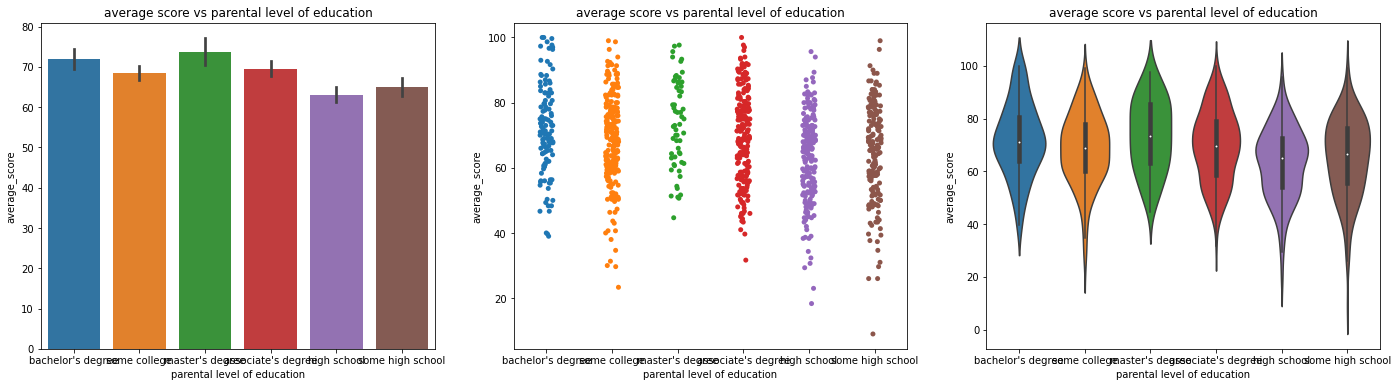

In [14]:
f, ax = plt.subplots(1, 3, figsize = (24, 6))

sns.barplot(x=df['parental level of education'], y=df['average_score'], ax = ax[0])
ax[0].set_title("average score vs parental level of education")

sns.stripplot(x=df['parental level of education'], y=df['average_score'], ax = ax[1])
ax[1].set_title("average score vs parental level of education")

sns.violinplot(x=df['parental level of education'], y=df['average_score'], ax=ax[2])
ax[2].set_title("average score vs parental level of education")

plt.show()

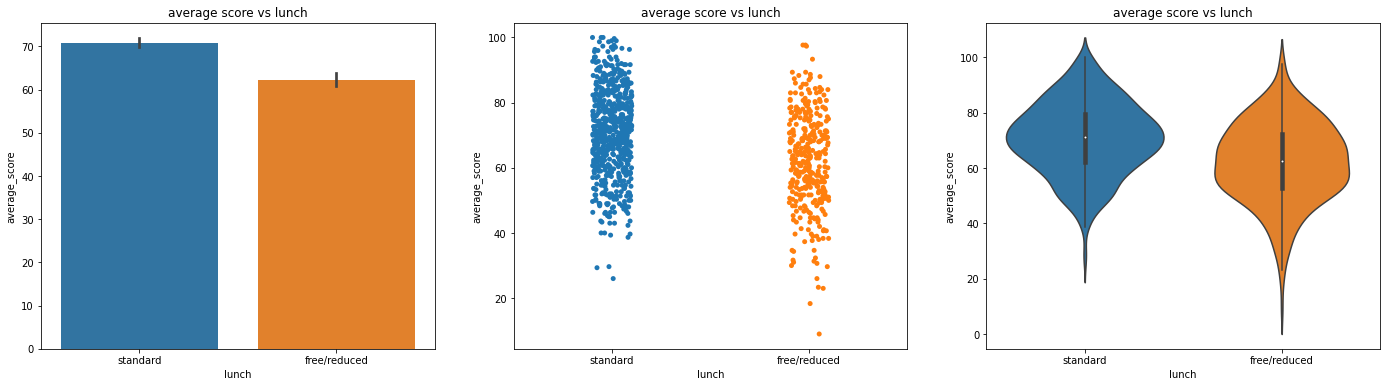

In [15]:
f, ax = plt.subplots(1, 3, figsize = (24, 6))

sns.barplot(x=df['lunch'], y=df['average_score'], ax = ax[0])
ax[0].set_title("average score vs lunch")

sns.stripplot(x=df['lunch'], y=df['average_score'], ax = ax[1])
ax[1].set_title("average score vs lunch")

sns.violinplot(x=df['lunch'], y=df['average_score'], ax=ax[2])
ax[2].set_title("average score vs lunch")

plt.show()


In [16]:
### Conclusion : Students taking free lunch has less score compare to other.

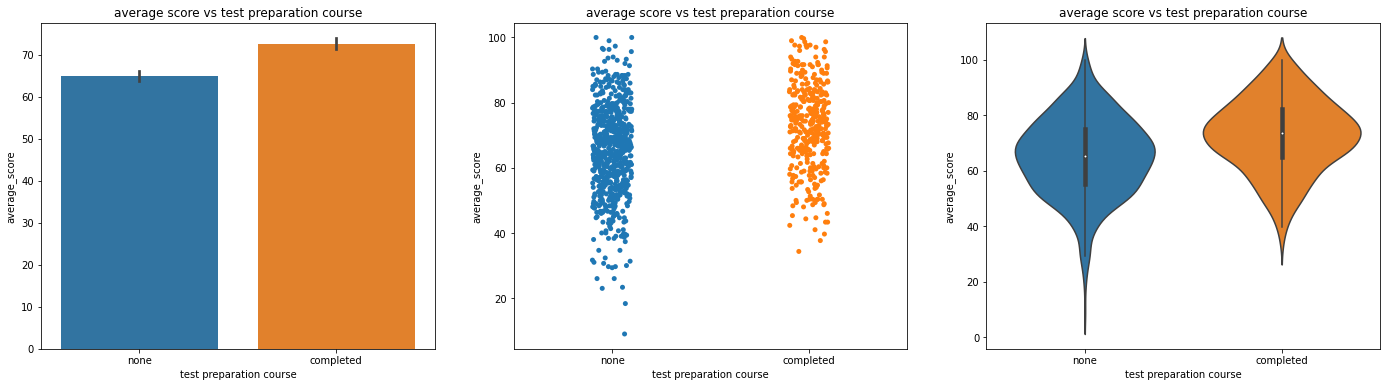

In [17]:
f, ax = plt.subplots(1, 3, figsize = (24, 6))

sns.barplot(x=df['test preparation course'], y=df['average_score'], ax = ax[0])
ax[0].set_title("average score vs test preparation course")

sns.stripplot(x=df['test preparation course'], y=df['average_score'], ax = ax[1])
ax[1].set_title("average score vs test preparation course")

sns.violinplot(x=df['test preparation course'], y=df['average_score'], ax=ax[2])
ax[2].set_title("average score vs test preparation course")

plt.show()

In [18]:
### Conclusion : Students who have completed the test preparation has better score. 

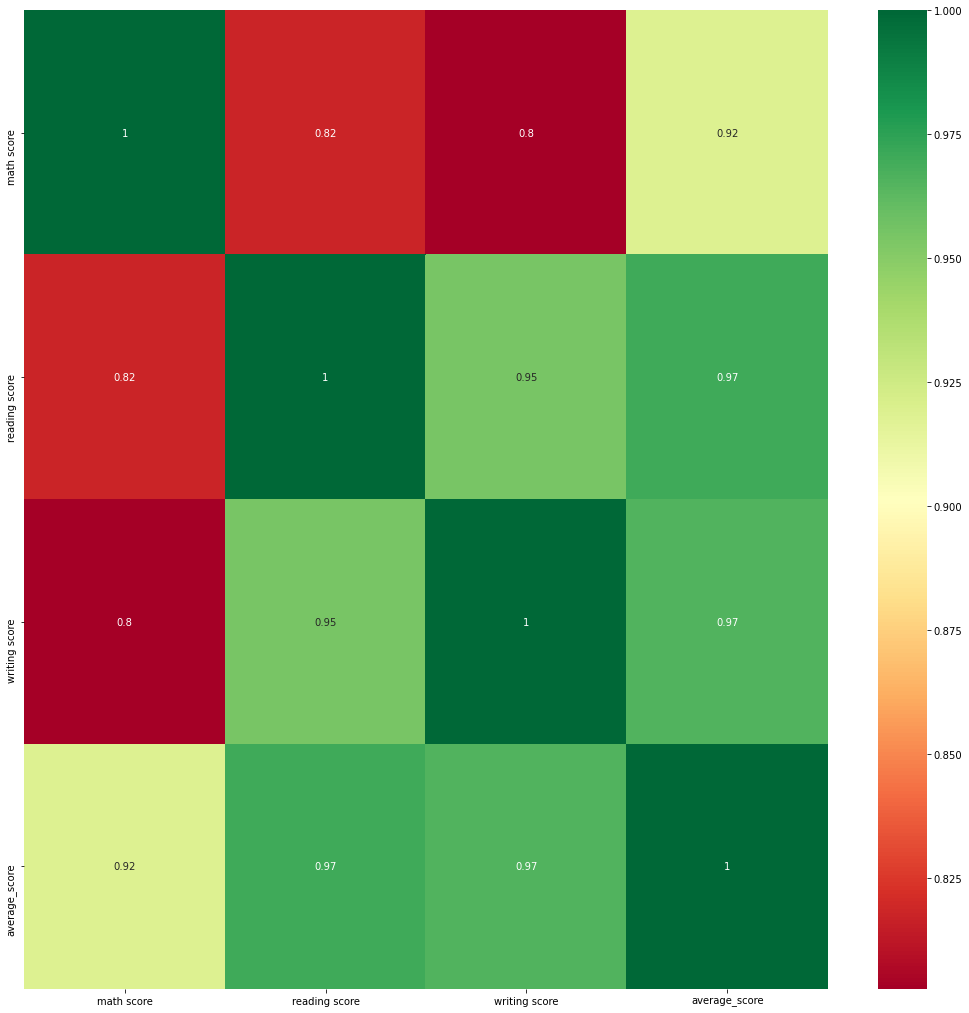

In [19]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Convert categorical to numeric

Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

* Nominal data --> data are not in any order --> OneHotEncoder is used in this case
* Ordinal data --> data are in order --> LabelEncoder is used in this case

In [20]:
df['gender'].replace({'male':1, 'female':0}, inplace=True)
df['race/ethnicity'].replace({'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4}, inplace=True)
df['parental level of education'].replace({'some college':0, "associate's degree":1, 'high school':2, 'some high school':3, "bachelor's degree":4, "master's degree":5},inplace=True)
df['lunch'].replace({'standard':0, 'free/reduced':1}, inplace=True)
df['test preparation course'].replace({'none':0, 'completed':1}, inplace=True)

In [21]:
df.drop(['math score', 'reading score', 'writing score'], axis=1, inplace=True)

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,0,1,4,0,0,72.666667
1,0,2,0,0,1,82.333333
2,0,1,5,0,0,92.666667
3,1,0,1,1,0,49.333333
4,1,2,0,0,0,76.333333


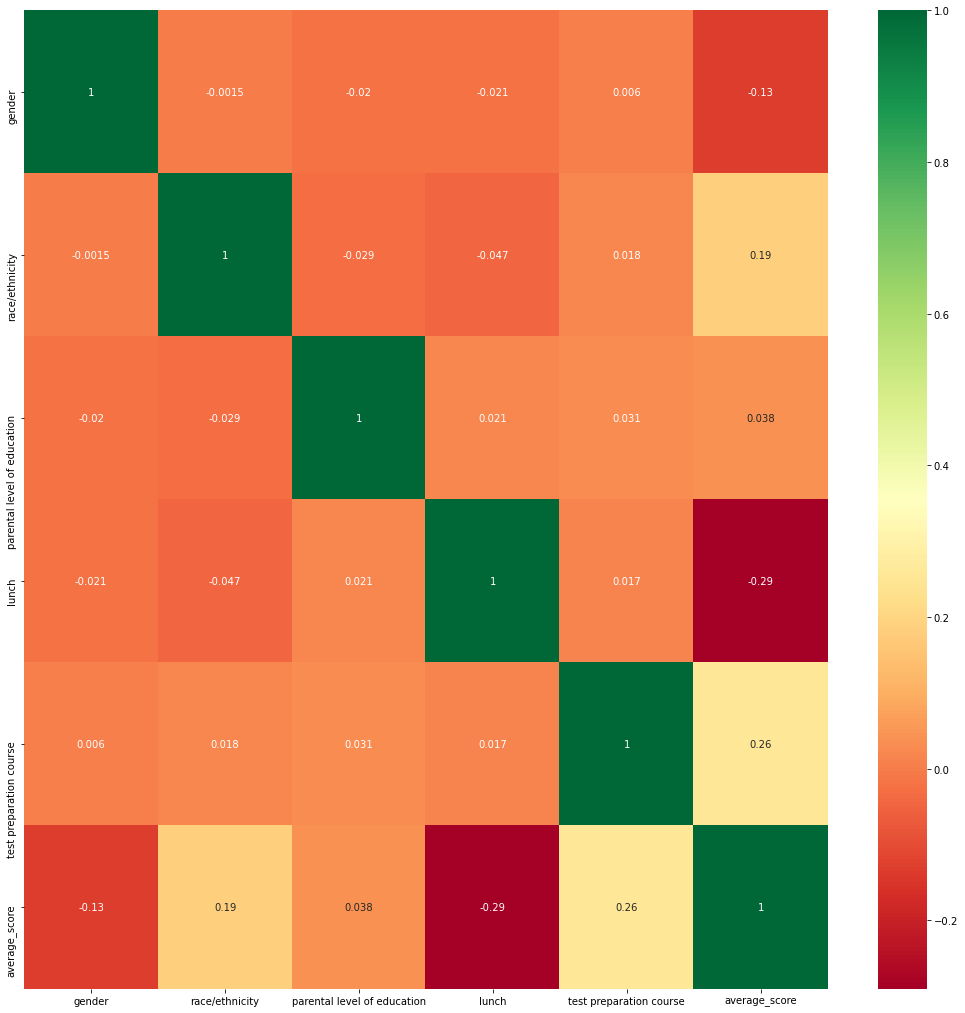

In [23]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [24]:
# Conclusion :- We are not seeing any high correaltion with the target/response variable.Still we will build the regression 
# and check the accuracy of the model. Our hypothesis is acuracy will be low and we can reject regression model and 

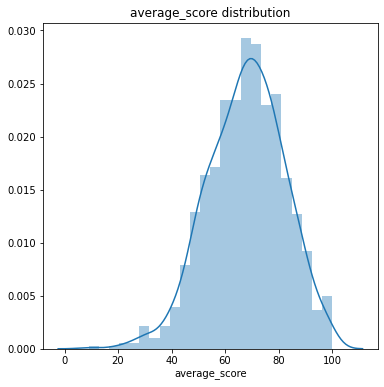

In [25]:
plt.figure(figsize = (6, 6))
sns.distplot(df['average_score'])
plt.title('average_score distribution')
plt.show()

In [26]:
## Response varable is little bit skew but for the time being we are contining with this. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import ensemble
from sklearn.metrics import mean_squared_error,r2_score

X = df.drop('average_score', axis=1)
y = df['average_score']
X = RobustScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 40 )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5), (200, 5), (800,), (200,))

## Fitting model using Random Forest
* 2.Split dataset into train and test set in order to prediction w.r.t X_test
* 3.If needed do scaling of data
* 4.Scaling is not done in Random forest
* 5.Import model
* 6.Fit the data
* 7.Predict w.r.t X_test
* 8.In regression check RSME Score
* 9.Plot graph

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
y_pred = reg_rf.predict(X_test)

In [30]:
reg_rf.score(X_train, y_train)

0.3832265455809336

In [31]:
reg_rf.score(X_test, y_test)

0.08290946272223243

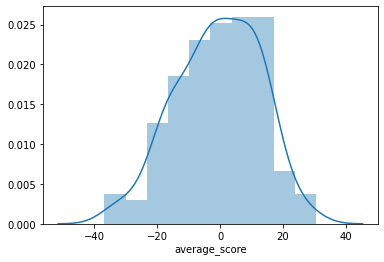

In [32]:
sns.distplot(y_test-y_pred)
plt.show()

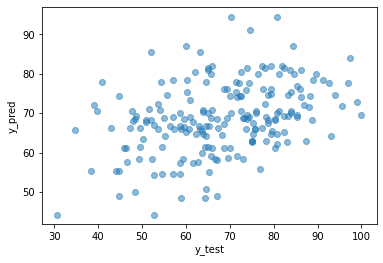

In [33]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 10.955697750512199
MSE: 178.63801758746973
RMSE: 13.365553396229792


In [35]:
metrics.r2_score(y_test, y_pred)

0.08290946272223243

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear regression score : ", lr.score(X_test, y_test) )
print("Linear regression Mean squared error : " , mean_squared_error(y_pred, y_test))
metrics.r2_score(y_test, y_pred)

Linear regression score :  0.23566624870431852
Linear regression Mean squared error :  148.88286440284122


0.23566624870431852

# Conclusion :- 
 * We do not have enough data points to do **regresion analysis**.

# Logistic Regresion 

In [37]:
#Classification Problem
df = pd.read_csv('StudentsPerformance.csv')
cutoff = df['math score'].quantile(q=0.5) + df['reading score'].quantile(q=0.5) + df['writing score'].quantile(q=0.5)
print(cutoff) 

# df['math score'].quantile(q=0.5): This calculates the median (50th percentile) of the 'math score' column in the DataFrame df. The q parameter is set to 0.5, indicating the desired quantile.
# df['reading score'].quantile(q=0.5): Similarly, this calculates the median of the 'reading score' column.
# df['writing score'].quantile(q=0.5): This calculates the median of the 'writing score' column

205.0


In [38]:
df['success'] = np.where(df['math score'] + df['reading score'] + df['writing score'] > cutoff, 1, 0)
df2 = df.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,success
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


<!-- data['race_ethnicity'] = [x.split(' ')[1] for x in data['race_ethnicity']]

This line splits each value in the 'race_ethnicity' column by a space (' ') and selects the second element (index 1) from the resulting list. The list comprehension [x.split(' ')[1] for x in data['race_ethnicity']] iterates over each value in the 'race_ethnicity' column, splits it using a space as the delimiter, and extracts the second element. The modified values are then assigned back to the 'race_ethnicity' column in the DataFrame.

For example, if the original 'race_ethnicity' column contained values like "Group A", "Group B", "Group C", etc., after this line of code is executed, the 'race_ethnicity' column will contain values "A", "B", "C", etc., effectively extracting the second word from each value. -->

In [39]:
gender = pd.get_dummies(df['gender'],drop_first = True)
race = pd.get_dummies(df['race/ethnicity'],drop_first = True)
parent_ed = pd.get_dummies(df['parental level of education'],drop_first = True)
lunch = pd.get_dummies(df['lunch'],drop_first = True)
test_prep = pd.get_dummies(df['test preparation course'],drop_first = True)

df.drop(columns = ['gender','race/ethnicity','parental level of education','lunch','test preparation course'], inplace=True)
df_final = pd.concat([df,gender,race,parent_ed,lunch,test_prep], axis=1)

In [40]:
df_final.head()

,math score,reading score,writing score,success,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,72,72,74,1,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,1,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,1,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,0,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,1,0,1,0,0,0,0,0,1,0,1,1


In [41]:
df_final['success'].value_counts()  # Data is not imbalanced . We can raly on accuracy metrics

0    502
1    498
Name: success, dtype: int64

Two versions of this data will be utilized. The first is the complete dataset, categorical and quantitative features, and the second is a dataset comprised of only the categorical features. The full version will be used as a comparison for the ability of the models to predict based on the categorical features.

In [42]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns = ['success'])
y = df_final['success']

X_cat = df_final.drop(columns = ['math score','reading score','writing score','success'])
y_cat = df_final['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40 )
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cat, y_cat, test_size = 0.2, random_state = 40 )

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

LR_model = LogisticRegression().fit(X_train, y_train)
LR_preds = LR_model.predict(X_test)

acc = round(accuracy_score(y_test, LR_preds), 2)
f1 = round(f1_score(y_test, LR_preds, pos_label = 1), 2)
print('accuracy:', acc)
print('f1:', f1)

pred_probs = LR_model.predict_proba(X_test)
fpr1, tpr1, th = roc_curve(y_test, pred_probs[:,1])

accuracy: 0.96
f1: 0.96


C:\Users\mukhek1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#define the logistic model for the categrical dataset and make predictions from the test data. 
LR_model2 = LogisticRegression().fit(X_train_c, y_train_c)
LR_preds2 = LR_model2.predict(X_test_c)

acc = round(accuracy_score(y_test, LR_preds2), 2)
f1 = round(f1_score(y_test, LR_preds2, pos_label = 1), 2)
print('accuracy:', acc)
print('f1:', f1)


#Further calculations for model fit analysis.
pred_probs2 = LR_model2.predict_proba(X_test_c)
fpr2, tpr2, th2 = roc_curve(y_test_c, pred_probs2[:,1])
auc = roc_auc_score(y_test_c, pred_probs2[:,1])

accuracy: 0.7
f1: 0.73


In [45]:
coefficients = LR_model2.coef_[0]
intercept = LR_model2.intercept_
odds_ratio = np.exp(coefficients)
feature_names = X_test_c.columns.to_list()

In [46]:
# Print the feature names and odds ratios
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {odds_ratio[i]}")

male: 0.5165776646669956
group B: 1.3711277259455725
group C: 1.53409543673762
group D: 2.2560024016784745
group E: 2.766889808086525
bachelor's degree: 1.2286904280191626
high school: 0.5938326476350004
master's degree: 1.2769858884201437
some college: 0.8473553154345644
some high school: 0.5339163645693635
standard: 2.4436079659302576
none: 0.39306812386822043


The logistic model provides insight into how the odds of being classified as a "Success" changed based on changes in the categorical features. Examining the model coefficients and the calculated odds ratios, being in racial groups D and E increase the probability of being successful.

Unsurprsisingly, identifing or being of a certain racial group has a large impact on academic success as well as if you qualify for free/reduced lunch, a strong measure of socioeconomic status. 



Text(1, 0, 'False Negatives: 11.00%')

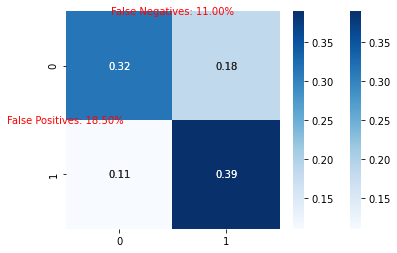

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have your true labels y_test_c and predicted labels y_pred

# Create the confusion matrix
cf3 = confusion_matrix(y_test_c, LR_preds2, normalize='all')

# Plot the confusion matrix as a heatmap
sns.heatmap(cf3, annot=True, cmap='Blues')

# Retrieve the values from the confusion matrix
true_positive = cf3[1, 1]
false_positive = cf3[0, 1]
false_negative = cf3[1, 0]

# Annotate the false positives and false negatives on the heatmap
ax = sns.heatmap(cf3, annot=True, cmap='Blues')
ax.text(0, 1, f'False Positives: {false_positive:.2%}', ha='center', va='center', color='red')
ax.text(1, 0, f'False Negatives: {false_negative:.2%}', ha='center', va='center', color='red')

In [48]:
target_names = ['success','not success']
print(classification_report(y_test_c, LR_preds2, target_names=target_names))

              precision    recall  f1-score   support

     success       0.74      0.63      0.68       100
 not success       0.68      0.78      0.73       100

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



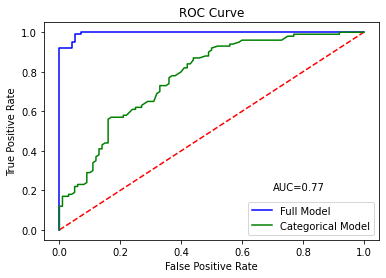

In [49]:
plt.plot(fpr1, tpr1, 'blue', label = 'Full Model')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.plot(fpr2, tpr2, 'green', label = 'Categorical Model')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.text(0.7, 0.2, 'AUC='+'{:.2f}'.format(auc))
plt.show()

Considering the confusion matrix, the logistic model was balanced in its ability to recognize true successes and failure with simliar false positive and false negative rates. The AUC of 0.77 indicated that the model is better than random chance (AUC = 0.5) while being far from a perfect classificer (AUC = 1.0).

# K-Nearest Neighbors Model

In [50]:
## BASE MODEL

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [52]:
from sklearn.model_selection import GridSearchCV
parameter=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 25]}]

In [53]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
KNNReg = GridSearchCV(estimator = KNN,
                  param_grid = parameter,
                  scoring = "accuracy", #sklearn.metrics.SCORERS.keys()
                  cv = 5,
                  verbose = 1)

In [54]:
KNNReg.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 25]}],
             scoring='accuracy', verbose=1)

In [55]:
print(KNNReg.best_params_)

{'n_neighbors': 25}


In [56]:
print(KNNReg.best_score_)

0.98375


In [57]:
df = pd.DataFrame(KNNReg.cv_results_)
df = df.sort_values("rank_test_score")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.011816,0.006238,0.004599,0.006241,25,{'n_neighbors': 25},0.98750,0.98750,0.96250,0.99375,0.98750,0.98375,0.010897,1
6,0.000000,0.000000,0.009218,0.007641,9,{'n_neighbors': 9},0.99375,0.98750,0.95625,0.98750,0.98125,0.98125,0.013110,2
4,0.003891,0.000952,0.006387,0.001345,7,{'n_neighbors': 7},0.99375,0.98125,0.95625,0.98750,0.98125,0.98000,0.012748,3
7,0.004861,0.006450,0.011082,0.005851,10,{'n_neighbors': 10},0.98750,0.98125,0.95625,0.98750,0.97500,0.97750,0.011592,4
2,0.003579,0.000473,0.006360,0.001629,5,{'n_neighbors': 5},0.99375,0.97500,0.95625,0.96875,0.98125,0.97500,0.012500,5
0,0.004020,0.004300,0.005564,0.004419,3,{'n_neighbors': 3},0.99375,0.97500,0.95625,0.95625,0.98125,0.97250,0.014577,6
5,0.003155,0.006311,0.005255,0.006164,8,{'n_neighbors': 8},0.98750,0.96875,0.94375,0.98125,0.97500,0.97125,0.015104,7
3,0.004365,0.000861,0.007187,0.001587,6,{'n_neighbors': 6},0.98750,0.96875,0.95000,0.96250,0.98125,0.97000,0.013346,8
1,0.009812,0.006729,0.006231,0.003681,4,{'n_neighbors': 4},0.98125,0.96875,0.95000,0.96250,0.98125,0.96875,0.011859,9


In [58]:
LR_preds = KNNReg.predict(X_test)

acc = round(accuracy_score(y_test, LR_preds), 2)
f1 = round(f1_score(y_test, LR_preds, pos_label = 1), 2)
print('accuracy:', acc)
print('f1:', f1)

pred_probs = KNNReg.predict_proba(X_test)
fpr1, tpr1, th = roc_curve(y_test, pred_probs[:,1])

accuracy: 1.0
f1: 1.0


In [59]:
## Actual Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
parameter=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 25]}]
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
KNNReg = GridSearchCV(estimator = KNN,
                  param_grid = parameter,
                  scoring = "accuracy", #sklearn.metrics.SCORERS.keys()
                  cv = 5,
                  verbose = 1)

KNNReg.fit(X_train_c, y_train_c)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 25]}],
             scoring='accuracy', verbose=1)

In [61]:
print(KNNReg.best_score_)

0.61


In [62]:
KNN_pred = KNNReg.predict(X_test_c)

print('accuracy:',accuracy_score(y_test_c, KNN_pred))
print('f1:', round(f1_score(y_test_c, KNN_pred, pos_label = 1),2))

accuracy: 0.67
f1: 0.68


In [63]:
# No Test And Train Score Are In Range So No Overfitting Problem

Text(1, 0, 'False Negatives: 14.50%')

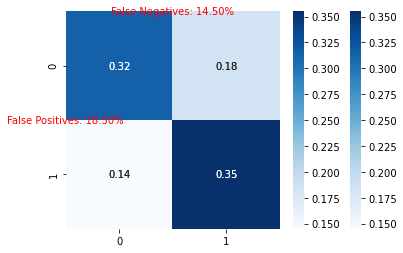

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have your true labels y_test_c and predicted labels y_pred

# Create the confusion matrix
cf3 = confusion_matrix(y_test_c, KNN_pred, normalize='all')

# Plot the confusion matrix as a heatmap
sns.heatmap(cf3, annot=True, cmap='Blues')

# Retrieve the values from the confusion matrix
true_positive = cf3[1, 1]
false_positive = cf3[0, 1]
false_negative = cf3[1, 0]

# Annotate the false positives and false negatives on the heatmap
ax = sns.heatmap(cf3, annot=True, cmap='Blues')
ax.text(0, 1, f'False Positives: {false_positive:.2%}', ha='center', va='center', color='red')
ax.text(1, 0, f'False Negatives: {false_negative:.2%}', ha='center', va='center', color='red')

In [65]:
target_names = ['success','not success']
print(classification_report(y_test_c, KNN_pred, target_names=target_names))

              precision    recall  f1-score   support

     success       0.68      0.63      0.66       100
 not success       0.66      0.71      0.68       100

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200



In [66]:
# Calculate the number of true positives (TP)
TP = sum((y_test_c == 1) & (KNN_pred == 1))

# Calculate the number of true negatives (TN)
TN = sum((y_test_c == 0) & (KNN_pred == 0))

# Calculate the number of false positives (FP)
FP = sum((y_test_c == 0) & (KNN_pred == 1))

# Calculate the number of false negatives (FN)
FN = sum((y_test_c == 1) & (KNN_pred == 0))

# Print the values
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 71
True Negatives (TN): 63
False Positives (FP): 37
False Negatives (FN): 29


* The K-Nearest Neighbors model classifies instances within the test dataset by comparing it to others nearest to it or most similar. In this case, it considered similarity in regards to many variables and resulted in simliarly accurate predictions as the logistic model when considering the 14 most similar other instances of students. The K-Nearest Neighbors procedure did improve in identifing true negatives, classifying unsuccessful students as unsuccessful, but it also had a much higher false negative rate, more aggressively classifying succesful students as unsuccessful. Conversely, this approach had the lowest rate of false postives mostly due to its inability to correctly recognize successful students.

In [67]:
# XGBoost Model

In [68]:
#pip install xgboost

In [69]:
import xgboost as xgb
# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters, best score, and accuracy
print("Best parameters:", best_params)
print("Best score:", best_score)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.98125
Accuracy: 0.985


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   18.0s finished


In [70]:
import xgboost as xgb
# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train_c, y_train_c)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_c, y_train_c)

# Make predictions on the test set
y_pred = best_model.predict(X_test_c)

# Calculate accuracy score
accuracy = accuracy_score(y_test_c, y_pred)

# Print the best parameters, best score, and accuracy
print("Best parameters:", best_params)
print("Best score:", best_score)
print("Accuracy:", accuracy)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   21.7s finished


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.6325000000000001
Accuracy: 0.645


Text(1, 0, 'False Negatives: 16.00%')

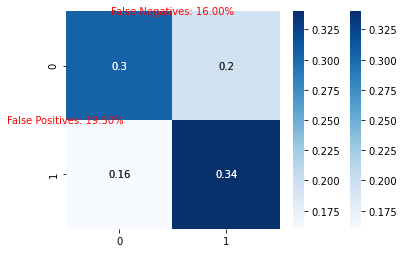

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have your true labels y_test_c and predicted labels y_pred

# Create the confusion matrix
cf3 = confusion_matrix(y_test_c, y_pred, normalize='all')

# Plot the confusion matrix as a heatmap
sns.heatmap(cf3, annot=True, cmap='Blues')

# Retrieve the values from the confusion matrix
true_positive = cf3[1, 1]
false_positive = cf3[0, 1]
false_negative = cf3[1, 0]

# Annotate the false positives and false negatives on the heatmap
ax = sns.heatmap(cf3, annot=True, cmap='Blues')
ax.text(0, 1, f'False Positives: {false_positive:.2%}', ha='center', va='center', color='red')
ax.text(1, 0, f'False Negatives: {false_negative:.2%}', ha='center', va='center', color='red')


In [72]:
# Calculate the number of true positives (TP)
TP = sum((y_test_c == 1) & (y_pred == 1))

# Calculate the number of true negatives (TN)
TN = sum((y_test_c == 0) & (y_pred == 0))

# Calculate the number of false positives (FP)
FP = sum((y_test_c == 0) & (y_pred == 1))

# Calculate the number of false negatives (FN)
FN = sum((y_test_c == 1) & (y_pred == 0))

# Print the values
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 68
True Negatives (TN): 61
False Positives (FP): 39
False Negatives (FN): 32


In [73]:
target_names = ['success','not success']
print(classification_report(y_test_c, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     success       0.66      0.61      0.63       100
 not success       0.64      0.68      0.66       100

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.64       200



The **XGBoost model** (short for Extreme Gradient Boosting) is an ensemble model that utilizes a boosting technique called gradient boosting. It involves sequentially building multiple weak prediction models, such as decision trees, to create a strong predictive model.

# Conclusion 

The full models all performed in all three modeling scenarios with similar accuracy and f1 as well as the categorical models. There was a noticeable, consistent drop in performance of the cateogorical model underperforming its corresponding full model by roughly 30%. 

* This *consistency is impressive.* It shows that trying to judge academic outcomes solely based on demographic features can be problematic and foolish. It also supports the idea that success should be viewed in a broader way, considering various aspects of achievement rather than just focusing on academics.


The general predictive performance was consistent both in how each modeling scenario dealt with the two datasets (categorical and full), the three modeling procedures did have some differences in their effectiveness in what they were able to accurately predict. 

But XGBosst And KNN has little high False Negetive Rate Compare To Logistic Regression.But Xgboost is more shopisticated model compare to logistic regresion. And we are more interested about final prediction. So we will stick with XGBoost.

As the model accuracy's are low so we can conclude that A student's background and family situation have some bearing but cannot be used as strong determinants in anticipating future success. 

**But Understanding the role that demographics play is crucial in providing enough support to students who are in danger of being misclassified.**

**A modeling procedure like this can be used to identify those students who would be classified incorrectly, allow for further examination of their record, and provide guidance in proactively offering services to assist those students in order to achieve at their highest potential.**